# SC1015 Mini-Project: What are the major risk factors that allows us to predict whether the patient have heart disease?

### Essential Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  
> Sklearn : Machine Learning and Statistical Modeling

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
sb.set() # set the default Seaborn style for graphics
pd. set_option('display.max_columns', None)

## Exploratory Data Analysis

In [4]:
#Import Dataset
heart_data = pd.read_csv('Dataset/heart.csv')
heart_data.head(100)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,M,ASY,130,263,0,Normal,140,Y,2.0,Flat,1
96,43,M,ATA,142,207,0,Normal,138,N,0.0,Up,0
97,39,M,NAP,160,147,1,Normal,160,N,0.0,Up,0
98,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0


In [5]:
heart_data.shape

(918, 12)

Before Dataset is cleaned, there are 918 Rows and 12 Columns

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Metadata
>Age: age of the patient [years]  
>Sex: sex of the patient [M: Male, F: Female]  
>ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]  
>RestingBP: resting blood pressure [mm Hg]  
>Cholesterol: serum cholesterol [mm/dl]  
>FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]  
>RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]  
>MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]  
>ExerciseAngina: exercise-induced angina [Y: Yes, N: No]  
>Oldpeak: oldpeak = ST [Numeric value measured in depression]  
>ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]  
>HeartDisease: output class [1: heart disease, 0: Normal]  

In [9]:
#remove duplicates
heart_data = heart_data.drop_duplicates()
heart_data.info()
heart_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


After Dataset is cleaned, there are 130,990 Rows and 21 Columns

### Analysis of numerical variable

In [97]:
covid_num = covid_data_clean[["AGE","DIED"]].copy()
covid_num

,AGE,DIED
0,55,1
1,40,0
2,37,0
3,25,0
4,24,0
...,...,...
130985,61,0
130986,63,0
130987,23,0
130988,56,0


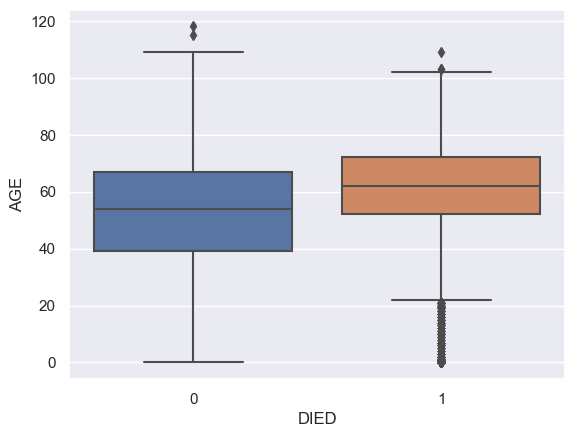

In [86]:
#Box-plot representation
sb.boxplot(x='DIED', y='AGE', data=covid_num)
plt.show()

Based on this box plot, we are able to see that the mean age for those who died are higher than those alive.

In [87]:
#Removing outliers outside of IQR
def remove_outliers_IQR(df,colName):
    q1=df[colName].quantile(0.25)
    q3=df[colName].quantile(0.75)
    IQR=q3-q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    outliers = df[(df[colName] < lower_bound) | (df[colName] > upper_bound)]
    df_no_outliers = df.drop(outliers.index)
    return df_no_outliers

DIED
1    67019
0    63971
Name: count, dtype: int64


C:\Users\NTU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


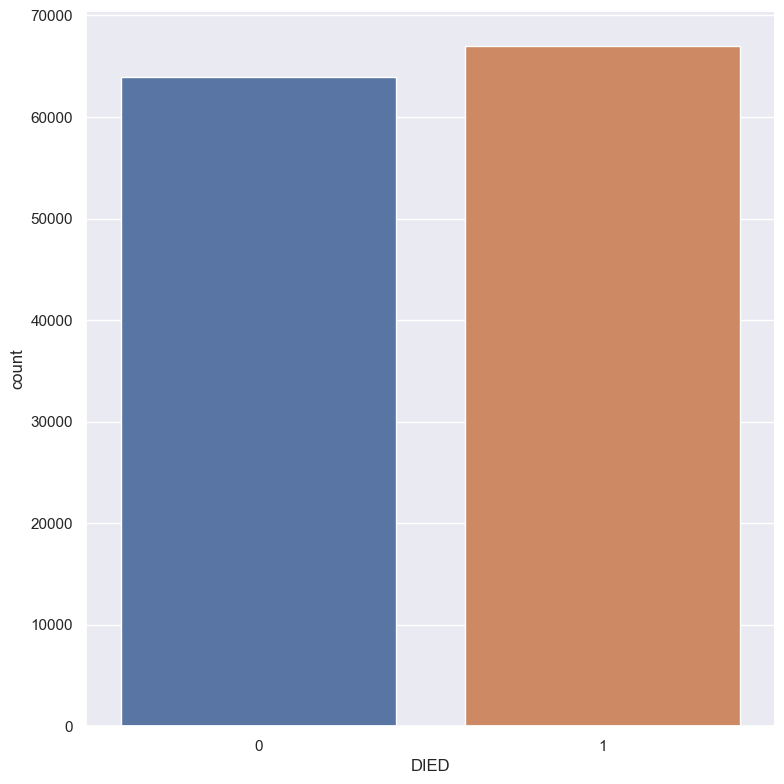

In [88]:
# Pokemons of each Primary Type
print(covid_num["DIED"].value_counts())
sb.catplot(x = "DIED", data = covid_num, kind = "count", height = 8)

In [89]:
#For patients that died
covid_died_before=covid_num[covid_num["DIED"]==0]
covid_died_after=remove_outliers_IQR(covid_died_before,'AGE')
print("Data before: ", covid_died_before.shape)
print("Data after: ", covid_died_after.shape)
print("Outliers removed: ",covid_died_before.shape[0]-covid_died_after.shape[0])

Data before:  (63971, 2)
Data after:  (63969, 2)
Outliers removed:  2


In [90]:
#For patients that are alive
covid_alive_before=covid_num[covid_num["DIED"]==1]
covid_alive_after=remove_outliers_IQR(covid_alive_before,'AGE')
print("Data before: ", covid_alive_before.shape)
print("Data after: ", covid_alive_after.shape)
print("Outliers removed: ",covid_alive_before.shape[0]-covid_alive_after.shape[0])

Data before:  (67019, 2)
Data after:  (66134, 2)
Outliers removed:  885


In [98]:
#Result dataset after removing outlier based on "DIED" variable.
print("Before cleaning: ",covid_num.shape)
covid_num_cleaned = pd.concat([covid_died_after, covid_alive_after], axis=0)
covid_num_cleaned.reset_index(drop=True, inplace=True)
print("After cleaning: ",covid_num.shape)
print("Total outliers removed: ",covid_num.shape[0]-covid_num_cleaned.shape[0])

Before cleaning:  (130990, 2)
After cleaning:  (130990, 2)
Total outliers removed:  887


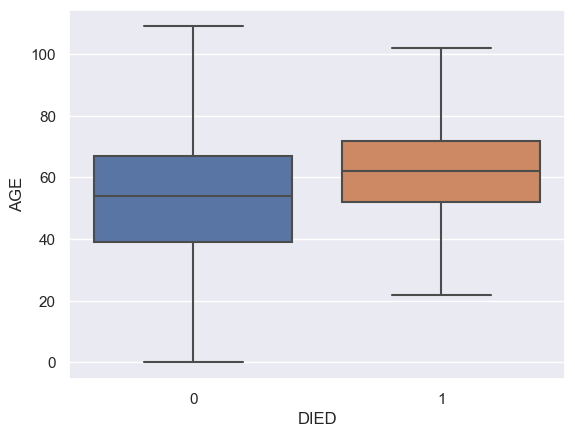

In [100]:
#Box-plot representation
sb.boxplot(x='DIED', y='AGE', data=covid_num_cleaned)
plt.show()

After removing outliers, we can see that the boxplot result remained similar.

### Analysis of categorical variable

## Modelling